In [176]:
# build a simple linear regression in python
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression as lm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from itertools import combinations
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import scipy as sp
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

# Importing data 

In [104]:
df = pd.read_csv('kc_house_data_train.csv')

In [105]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


# Exploring Data: Missing Values

In [106]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
sqft_lot15,0,0.0
sqft_living15,0,0.0
id,0,0.0
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0


# Exploring Data: Numerical Values

In [107]:
num_var = [var for var in df.columns if df[var].dtypes !='O']

In [108]:
df[num_var]

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,17286,8819900270,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,17287,3816300095,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,17288,122069107,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


# Exploring Data: Years Variables

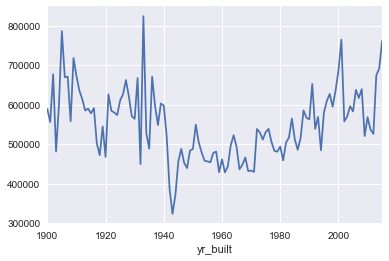

In [109]:
df.groupby('yr_built')['price'].mean().plot()

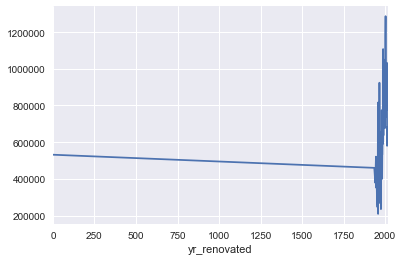

In [110]:
df.groupby('yr_renovated')['price'].mean().plot()

In [111]:
years_var = [var for var in num_var if 'yr' in var]
years_var

['yr_built', 'yr_renovated']

In [112]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


In [113]:
discrete_var = [var for var in num_var if len(df[var].unique())<20 and var not in years_var+['id']]

In [114]:
discrete_var

['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

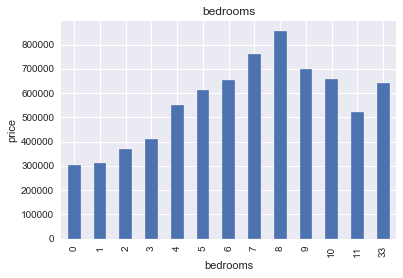

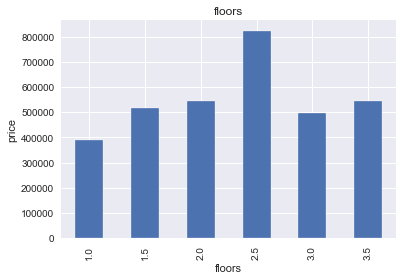

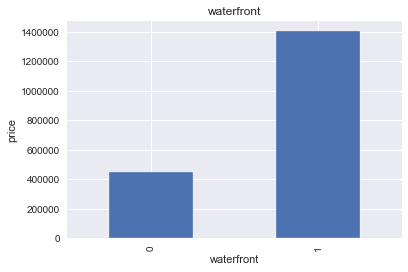

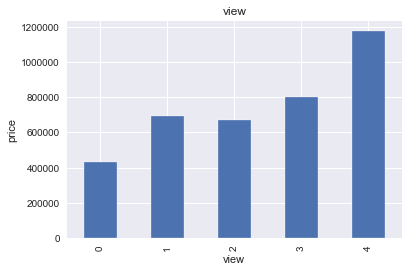

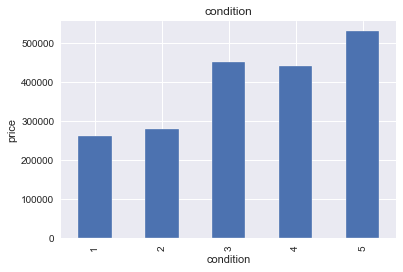

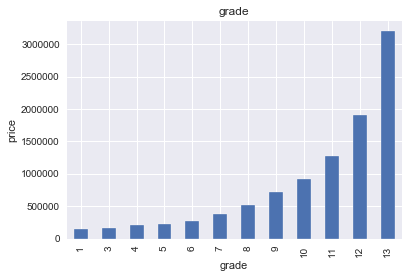

In [115]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['price'].median().plot.bar()
    plt.title(var)
    plt.ylabel('price')
    plt.show()
    
for var in discrete_var:
    analyse_discrete(df, var)

# Exploring Data: Continous Variables

In [116]:
cont_var = [var for var in num_var if var not in discrete_var+years_var]

In [117]:
cont_var

['Unnamed: 0',
 'id',
 'price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

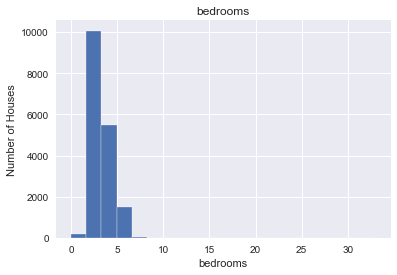

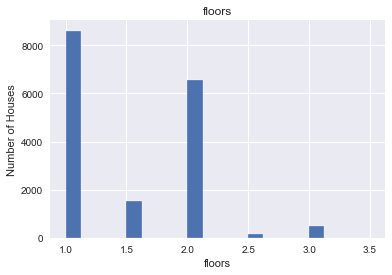

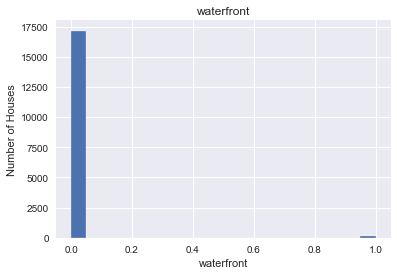

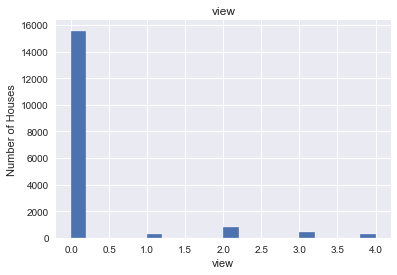

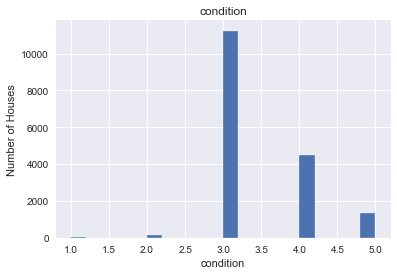

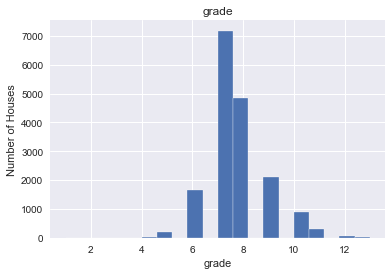

In [118]:
def analyse_cont(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.xlabel(var)
    plt.title(var)
    plt.ylabel('Number of Houses')
    plt.show()
    
for var in discrete_var:
    analyse_cont(df, var)

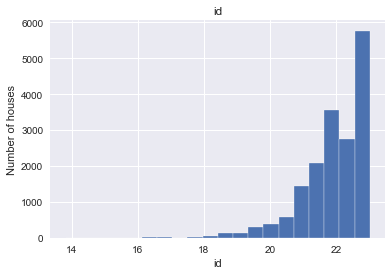

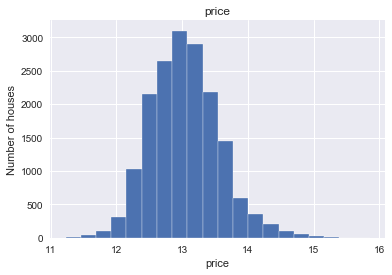

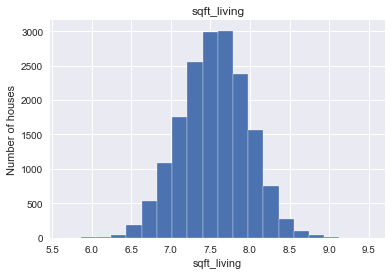

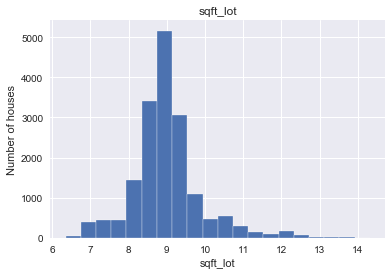

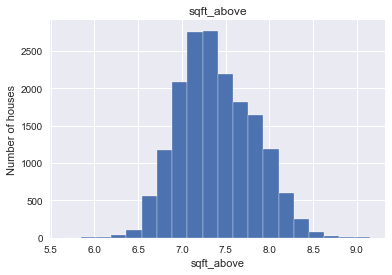

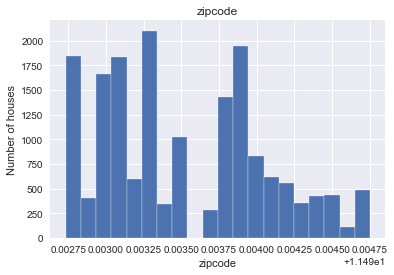

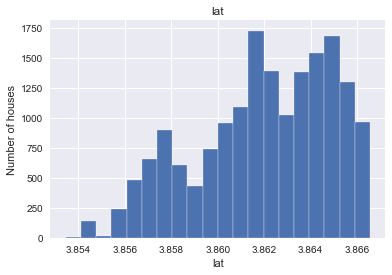

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


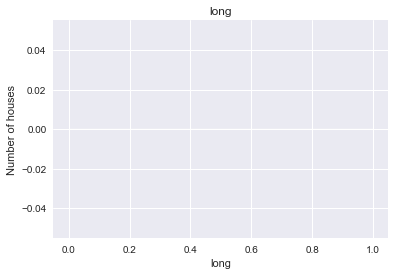

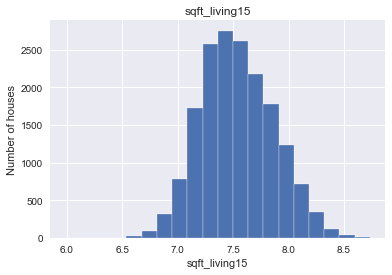

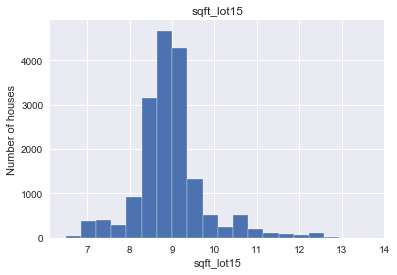

In [119]:
# Let's go ahead and analyse the distributions of these variables
def analyse_transformed_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in df[var].unique():
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=20)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
    
for var in cont_var:
    analyse_transformed_continous(df, var)

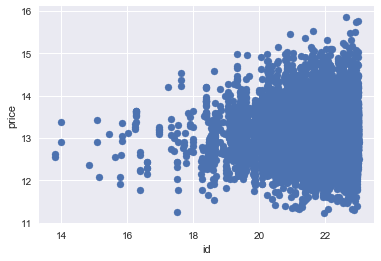

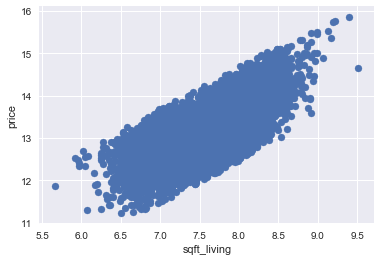

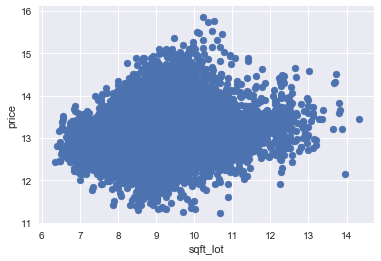

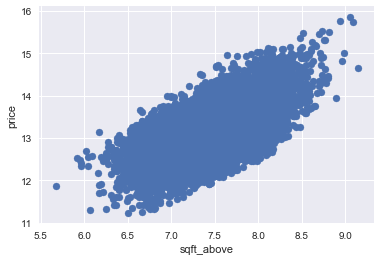

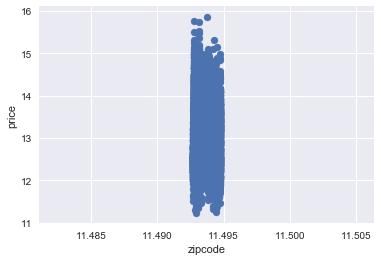

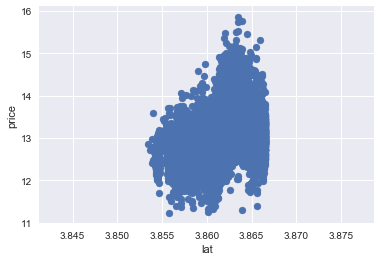

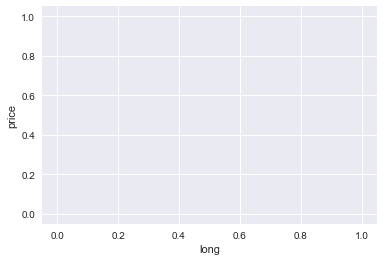

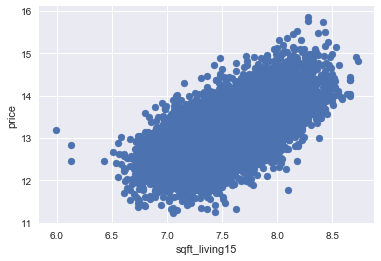

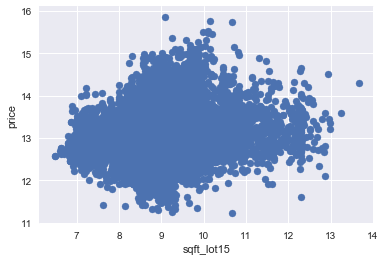

In [120]:
# let's explore the relationship between the house price and the transformed variables
# with more detail
def transform_analyse_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in df[var].unique():
        pass
    else:
        # log transform
        df[var] = np.log(df[var])
        df['price'] = np.log(df['price'])
        plt.scatter(df[var], df['price'])
        plt.ylabel('price')
        plt.xlabel(var)
        plt.show()
    
for var in cont_var:
    if var !='price':
        transform_analyse_continous(df, var)

# Exploring Data: Outliers

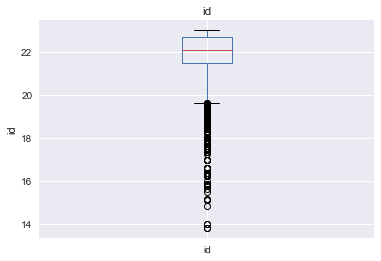

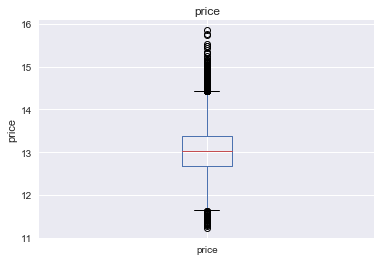

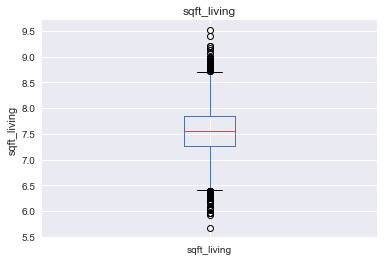

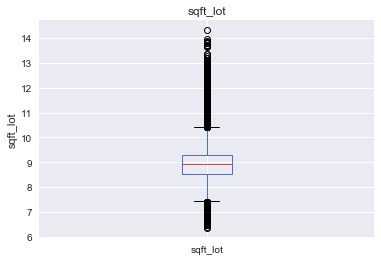

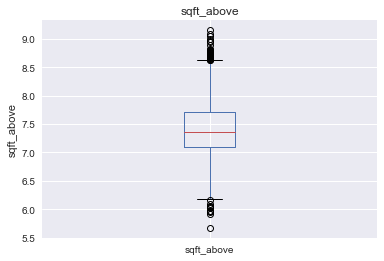

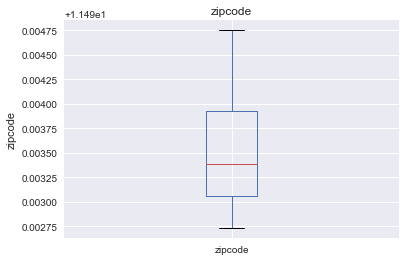

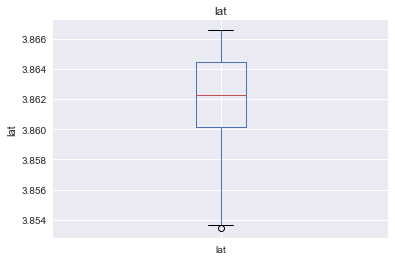

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


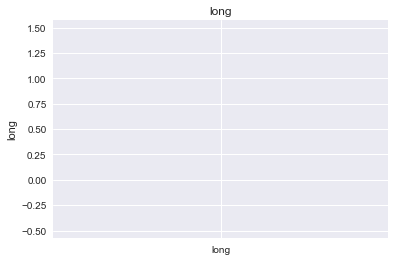

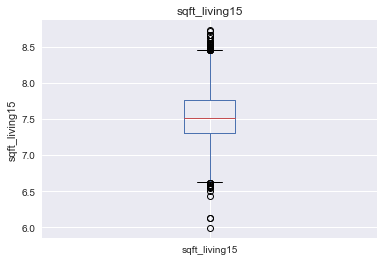

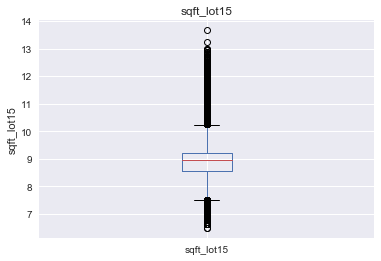

In [121]:
def outliers(df, var):
    df=df.copy()
    
    if 0 in df[var].unique():
        pass
    else:
        df[var]=np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()
for var in cont_var:
    outliers(df, var)

# Exploring Data: Categorical Values

In [122]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Cleaning up some data

In [123]:
df['yr_built'] = df["yr_built"].astype(str)
df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y')
df['yr_old'] =  df['yr_built'].map(lambda x: 2020-x.year )

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

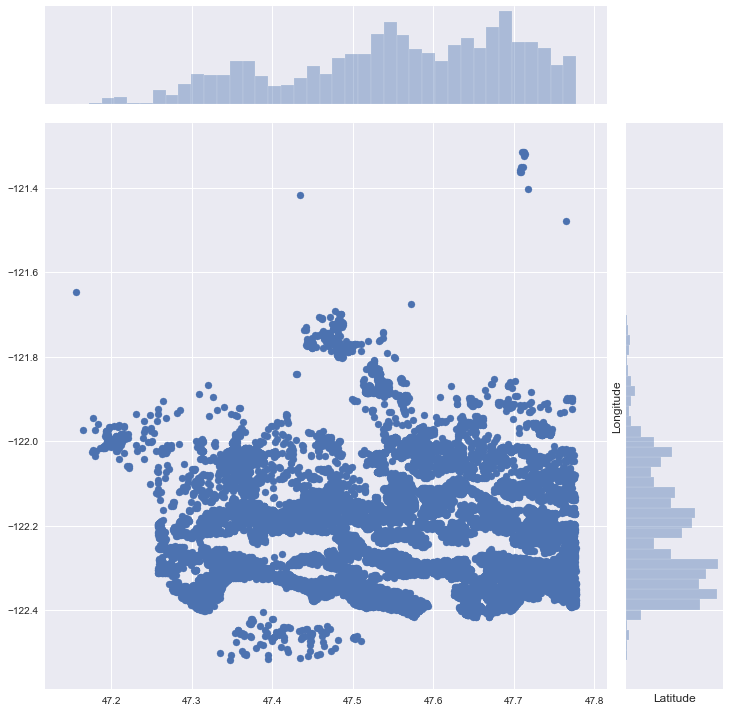

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [124]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

In [210]:
df['geolat'] = df['lat'].apply(lambda x: 1 if (x >47.5) & (x < 47.7) else 0)
df['geolong'] = df['long'].apply(lambda x: 1 if (x >-122.4) & (x < -122.0) else 0)
df['geoprice'] = df['geolat'] + df['geolong']
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x>0 else 0)

In [127]:
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x>0 else 0)

In [128]:
df.sqft_living.describe()

count    17290.000000
mean      2081.464604
std        920.018539
min        290.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [129]:
df = df[df['sqft_living']<10000.000000]
df.sqft_living.describe()

count    17287.000000
mean      2079.764737
std        910.807156
min        290.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max       9890.000000
Name: sqft_living, dtype: float64

In [130]:
df = df[df['bedrooms']<30]
df.bedrooms.describe()

count    17286.000000
mean         3.370300
std          0.911302
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

In [131]:
df = df.drop(columns=['date', 'id', 'yr_built'])

In [132]:
target = df.price
features = df

# Identifying features

In [133]:
df['price_log'] = np.log(df['price'])
df['price_sqrt'] = np.sqrt(df['price'])
df

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,geolat,geolong,geoprice,price_log,price_sqrt
0,0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,0,98058,47.4388,-122.162,2390,7700,34,0,1,1,12.807653,604.152299
1,1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,0,98115,47.6784,-122.285,2370,6283,43,1,1,2,13.670485,930.053762
2,2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,0,98006,47.5646,-122.129,3710,9685,23,1,1,2,13.852806,1018.822850
3,3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,0,98034,47.6995,-122.228,4050,14226,30,1,1,2,14.214287,1220.655562
4,4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,0,98052,47.6647,-122.083,2250,4050,16,1,1,2,13.474428,843.208159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,0,98008,47.5858,-122.112,2730,10400,62,1,1,2,13.527828,866.025404
17286,17286,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,0,98105,47.6687,-122.288,1350,4013,72,1,1,2,12.994530,663.324958
17287,17287,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,0,98028,47.7635,-122.262,1760,9403,67,0,1,1,12.644328,556.776436
17288,17288,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,0,98038,47.4199,-121.990,2080,108028,49,0,0,0,12.965710,653.834842


In [134]:
target = df.price
features = df

In [135]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)

In [270]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
subset_scaled = []
for var in df:
    new_col = var +"_scaled"
    df[new_col] = scaler.fit_transform(df[[var]])
    subset_scaled.append(new_col)

In [138]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,geolat,geolong,geoprice,price_log,price_sqrt
Unnamed: 0,NaN,0.011764,0.011548,0.004857,0.008832,0.001318,0.010115,0.003928,0.001573,0.000574,0.005864,0.003516,0.011663,0.002170,0.008325,0.008045,0.004121,0.009833,0.000074,0.004887,0.003303,0.007139,0.000655,0.009250,0.010868
price,NaN,NaN,0.317305,0.524949,0.699845,0.088485,0.257372,0.247902,0.389000,0.039027,0.674117,0.605080,0.311133,0.107819,0.045249,0.313910,0.022763,0.591271,0.084479,0.059070,0.380484,0.023473,0.325888,0.895829,0.969231
bedrooms,NaN,NaN,NaN,0.520104,0.589806,0.033423,0.175961,0.011885,0.085110,0.026507,0.362207,0.485947,0.307268,0.017849,0.148362,0.007920,0.126742,0.401207,0.031423,0.158782,0.003772,0.018258,0.012522,0.348477,0.342872
bathrooms,NaN,NaN,NaN,NaN,0.754130,0.083870,0.499393,0.058986,0.188293,0.123548,0.663890,0.684978,0.273367,0.045919,0.197992,0.021963,0.219192,0.567010,0.084234,0.512119,0.083657,0.078327,0.034891,0.546520,0.549645
sqft_living,NaN,NaN,NaN,NaN,NaN,0.167798,0.356395,0.093811,0.277352,0.058347,0.763609,0.875913,0.423316,0.046465,0.192263,0.054356,0.238494,0.757028,0.183455,0.324390,0.091945,0.087270,0.037753,0.693412,0.716499
sqft_lot,NaN,NaN,NaN,NaN,NaN,NaN,0.000396,0.010856,0.075599,0.009749,0.108006,0.181676,0.005872,0.004683,0.126898,0.079948,0.224767,0.134183,0.708100,0.051029,0.093419,0.225055,0.195987,0.097140,0.096618
floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021623,0.021469,0.261987,0.458951,0.528048,0.254506,0.004316,0.058022,0.050230,0.132309,0.281792,0.006093,0.490227,0.138777,0.088462,0.078718,0.309046,0.291973
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.395142,0.011819,0.089665,0.064976,0.071999,0.085712,0.041918,0.013561,0.044681,0.087001,0.022359,0.022416,0.004520,0.018140,0.013125,0.167975,0.209720
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050657,0.247792,0.158258,0.276417,0.091480,0.089831,0.002258,0.075700,0.279980,0.071729,0.052787,0.077700,0.066981,0.035305,0.340727,0.375539
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.138679,0.155924,0.172127,0.059067,0.005310,0.012173,0.107320,0.089261,0.004954,0.359331,0.016828,0.064588,0.047387,0.041647,0.042007


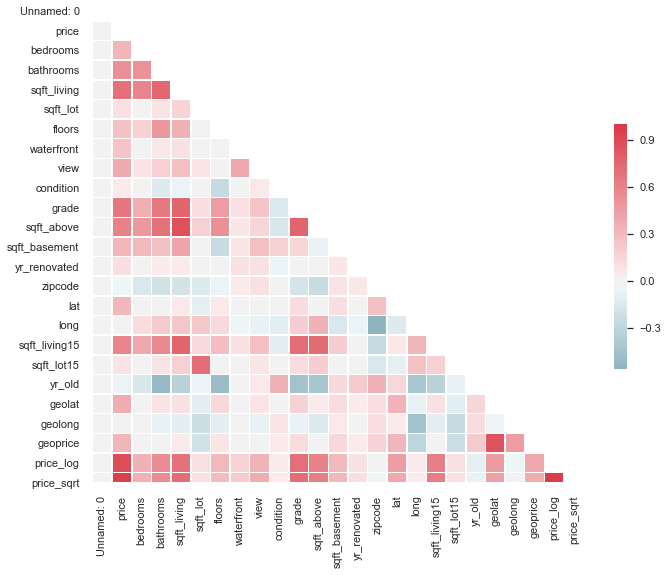

In [139]:

sns.set(style="white")


# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(1)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,4.0,Unnamed: 0
1,503.9,price
2,25.3,bedrooms
3,29.0,bathrooms
4,inf,sqft_living
5,2.3,sqft_lot
6,17.7,floors
7,1.3,waterfront
8,1.6,view
9,35.5,condition


In [141]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(1)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,4.0,Unnamed: 0
1,20.3,price
2,25.3,bedrooms
3,29.0,bathrooms
4,inf,sqft_living
5,2.3,sqft_lot
6,17.7,floors
7,1.3,waterfront
8,1.6,view
9,35.5,condition


In [142]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=10)

selector.fit(X_train, y_train)

SelectKBest(k=10, score_func=<function f_regression at 0x1c21067bf8>)

In [143]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

In [144]:
list(removed_columns)

['Unnamed: 0',
 'price',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'sqft_basement',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_lot15',
 'yr_old',
 'geolong']

In [145]:
list(selected_columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'view',
 'grade',
 'sqft_above',
 'sqft_living15',
 'geolat',
 'geoprice',
 'price_log']

# Model Selection

In [97]:
# check classification accuracy of KNN with K=5
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred))

27598082836.171272


In [147]:
scale = MinMaxScaler()
transformed = scale.fit_transform(X_train)
X_train = pd.DataFrame(transformed, columns = X_train.columns)

In [148]:
transformed = scale.transform(X_test)
X_test = pd.DataFrame(transformed, columns = X_train.columns)

In [239]:
X_train.drop(columns ='price_log', inplace=True)

In [149]:
y_train

2512      299950.0
5853      311750.0
10835     968000.0
17077     400000.0
10690     729000.0
           ...    
16712    1015000.0
3157      515000.0
10734     475000.0
5243      383000.0
11685     325000.0
Name: price, Length: 13828, dtype: float64

In [150]:
ridge_01 = Ridge(alpha=0.1)
ridge_01.fit(X_train, y_train)

lasso_01 = Lasso(alpha=0.1)
lasso_01.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
print("Unpenalized Linear Regression Coefficients are:{}".format(lin.coef_))
print(abs(lin.coef_.sum()))
print("Unpenalized Linear Regression Intercept:{}".format(lin.intercept_))

Unpenalized Linear Regression Coefficients are:[-281151.24138797 -131991.75352326  804971.44279486  167597.03845083
   28601.46611914  137760.48543829 -169653.74463214  -45287.12461373
   85747.00443919 2387807.62185454]
2984401.1949397344
Unpenalized Linear Regression Intercept:-485724.64352745307


In [152]:
print("Lasso Regression Coefficients are:{}".format(lasso_01.coef_))
print(abs(lasso_01.coef_.sum()))
print("Lasso Linear Regression Intercept:{}".format(lasso_01.intercept_))

Lasso Regression Coefficients are:[-281122.04004551 -131948.82954942  804907.06774505  167595.2066146
   28588.34853996  137742.53116228 -169611.55652638  -45281.44902978
   85738.60605226 2387798.6159974 ]
2984406.500960463
Lasso Linear Regression Intercept:-485729.0383628224


In [153]:
print("Ridge Regression Coefficients are:{}".format(ridge_01.coef_))
print(abs(ridge_01.coef_.sum()))
print("Ridge Linear Regression Intercept:{}".format(ridge_01.intercept_))

Ridge Regression Coefficients are:[-279922.98847178 -131058.37079604  802063.69676298  167998.78149592
   30040.6475644   139112.54422366 -168415.45556373  -44974.64714224
   85819.20582175 2384003.85119155]
2984667.2650864692
Ridge Linear Regression Intercept:-485765.82555485785


# Different Parameters

In [241]:
ridge_05 = Ridge(alpha=0.5)
ridge_05.fit(X_train, y_train)

lasso_05 = Lasso(alpha=0.5)
lasso_05.fit(X_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [155]:
print("Lasso Regression Coefficients are:{}".format(lasso_05.coef_))
print(lasso_05.coef_.sum())
print("Lasso Linear Regression Intercept:{}".format(lasso_05.intercept_))

Lasso Regression Coefficients are:[-281002.40862015 -131777.647823    804637.44789601  167588.21222113
   28535.37399854  137678.50097176 -169440.78122766  -45258.76500506
   85705.17681115 2387763.89080481]
2984429.0000275206
Lasso Linear Regression Intercept:-485747.4249451031


In [156]:
print("Ridge Regression Coefficients are:{}".format(ridge_05.coef_))
print(ridge_05.coef_.sum())

print("Ridge Linear Regression Intercept:{}".format(ridge_05.intercept_))

Ridge Regression Coefficients are:[-275116.42543846 -127393.65409233  790845.17026593  169577.92094664
   35722.40119038  144293.72612501 -163526.26042845  -43733.14367597
   86101.35233396 2368900.62612469]
2985671.713351409
Ridge Linear Regression Intercept:-485897.58907881903


In [157]:
ridge_1 = Ridge(alpha=1)
ridge_1.fit(X_train, y_train)

lasso_1 = Lasso(alpha=1)
lasso_1.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [158]:
print("Lasso Regression Coefficients are:{}".format(lasso_1.coef_))
print(lasso_1.coef_.sum())
print("Lasso Linear Regression Intercept:{}".format(lasso_1.intercept_))



Lasso Regression Coefficients are:[-280853.77178684 -131570.57154315  804308.92086616  167579.6706685
   28475.15178636  137597.07991634 -169228.97179433  -45229.95712056
   85663.37447534 2387715.53088989]
2984456.456357698
Lasso Linear Regression Intercept:-485770.1396080466


In [159]:
print("Ridge Regression Coefficients are:{}".format(ridge_1.coef_))
print(ridge_1.coef_.sum())
print("Ridge Linear Regression Intercept:{}".format(ridge_1.intercept_))

Ridge Regression Coefficients are:[-269333.97176845 -122958.19766134  777681.56577352  171492.35198957
   42657.96851401  150300.53313889 -157553.30985655  -42200.35544738
   86439.88409563 2350275.35543671]
2986801.824214612
Ridge Linear Regression Intercept:-485993.4090775477


In [171]:
# create predictions
y_h_ridge_train_01 = ridge_01.predict(X_train)
y_h_ridge_test_01 = ridge_01.predict(X_test)

y_h_lasso_train_01 = np.reshape(lasso_01.predict(X_train),(13828, 1))
y_h_lasso_test_01 = np.reshape(lasso_01.predict(X_test),(3458, 1))

y_h_lin_train = lin.predict(X_train)
y_h_lin_test = lin.predict(X_test)

In [172]:
print(y_h_ridge_train_01.shape)
print(y_h_ridge_test_01.shape)

(13828,)
(3458,)


In [173]:
print(type(y_h_lasso_train_01))
print(type(y_h_ridge_train_01))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Examining the Residual for Ridge, Lasso, and Unpenalized Regression coefficients

In [289]:
dffe = pd.read_csv('kc_house_data_test_features.csv')

In [290]:
dffe

,Unnamed: 0,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,4318,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
4319,4319,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
4320,4320,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
4321,4321,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [291]:
dffe['yr_built'] = dffe["yr_built"].astype(str)
dffe['yr_built'] = pd.to_datetime(dffe['yr_built'], format='%Y')
dffe['yr_old'] =  dffe['yr_built'].map(lambda x: 2020-x.year )

In [292]:
dffe['geolat'] = dffe['lat'].apply(lambda x: 1 if (x >47.5) & (x < 47.7) else 0)
dffe['geolong'] = dffe['long'].apply(lambda x: 1 if (x >-122.4) & (x < -122.0) else 0)
dffe['geoprice'] = dffe['geolat'] + df['geolong']
dffe['yr_renovated'] = dffe['yr_renovated'].apply(lambda x: 1 if x>0 else 0)

In [293]:
dffe = dffe[dffe['sqft_living']<10000.000000]

In [294]:
dffe = dffe[dffe['bedrooms']<30]

In [303]:
scale.fit_transform(dffe)

array([[0.4       , 0.38461538, 0.25614489, ..., 0.25044723, 0.        ,
        0.5       ],
       [0.4       , 0.38461538, 0.25614489, ..., 0.25044723, 0.        ,
        0.5       ],
       [0.3       , 0.38461538, 0.15265201, ..., 0.15205725, 1.        ,
        0.5       ],
       ...,
       [0.2       , 0.11538462, 0.09443726, ..., 0.07155635, 1.        ,
        1.        ],
       [0.3       , 0.38461538, 0.1694696 , ..., 0.14132379, 1.        ,
        1.        ],
       [0.2       , 0.11538462, 0.09443726, ..., 0.07155635, 1.        ,
        1.        ]])

In [304]:
dffe = dffe.drop(columns=['date', 'id', 'yr_built'])

KeyError: "['date' 'id' 'yr_built'] not found in axis"

In [305]:
dffe = dffe.drop(columns = ['Unnamed: 0', 'sqft_lot', 'floors', 'waterfront', 'condition','sqft_basement', 'yr_renovated','zipcode', 'lat', 'long', 'sqft_lot15', 'yr_old', 'geolong',])

KeyError: "['Unnamed: 0' 'sqft_lot' 'floors' 'waterfront' 'condition' 'sqft_basement'\n 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_lot15' 'yr_old' 'geolong'] not found in axis"

In [306]:
X_train.head()

,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_living15,geolat,geoprice
0,0.272727,0.129032,0.056723,0.0,0.3,0.043581,0.283478,0.0,0.5
1,0.363636,0.290323,0.199580,0.0,0.4,0.108363,0.273043,0.0,0.5
2,0.545455,0.354839,0.340336,1.0,0.6,0.200236,0.422609,1.0,1.0
3,0.363636,0.225806,0.155462,0.0,0.4,0.088339,0.200000,1.0,1.0
4,0.272727,0.322581,0.221639,0.0,0.6,0.248528,0.372174,1.0,1.0


In [307]:
test_predict = ridge_05.fit(X_train, y_train)

In [308]:
answers = test_predict.predict(dffe)

In [309]:
predictions_df.describe()

,0
count,1.382800e+04
mean,5.380581e+05
std,3.264322e+05
min,-5.015608e+05
25%,3.114176e+05
50%,5.060732e+05
75%,7.252984e+05
max,2.672321e+06


In [310]:
answers_df = pd.DataFrame(answers)

In [312]:
answers_df.describe()

,0
count,4.323000e+03
mean,4.238996e+09
std,1.849400e+09
min,6.651101e+08
25%,2.842564e+09
50%,3.883538e+09
75%,5.277225e+09
max,1.532201e+10


In [313]:
answers_df.to_csv('Rescaled_housing_preds_OH.csv', index=False, header=False)

In [146]:
lr_model = ols(formula='price~bedrooms*bathrooms+geoprice+sqft_living*sqft_above+grade*condition+yr_old+view+waterfront+sqft_living15+price_log', data=df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     8526.
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:50:04   Log-Likelihood:            -2.2756e+05
No. Observations:               17286   AIC:                         4.551e+05
Df Residuals:                   17270   BIC:                         4.553e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.541e+06   5.11e+04   -108.498      0.000   -5.64e+06   -5.44e+06
bedrooms               -6073.4736   3012.942     -2.016      0.044    -1.2e+04    -167.802
bathrooms              -5951.2292   4919.986     -1.210      0.226   -1.56e+04    3692.441
bedrooms:bathrooms      3724.4025   1212.661      3.071      0.002    1347.465    6101.340
geoprice               -6836.2749   2071.642     -3.300      0.001   -1.09e+04   -2775.647
sqft_living              -96.0242      3.754    -25.581      0.000    -103.382     -88.666
sqft_above              -177.0174      3.814    -46.408      0.000    -184.494    -169.541
sqft_living:sqft_above     0.0637      0.001     72.684      0.000       0.062       0.065
grade                  -7.028e+04   4767.384    -14.742      0.000   -7.96e+04   -6.09e+04
condition               -1.86e+05   9914.405    -18.763      0.000   -2.05e+05   -1.67e+05
grade:condition          2.62e+04   1338.646     19.569      0.000    2.36e+04    2.88e+04
yr_old                   323.4763     47.686      6.783      0.000     230.006     416.946
view                    1.929e+04   1481.654     13.020      0.000    1.64e+04    2.22e+04
waterfront              3.674e+05    1.2e+04     30.645      0.000    3.44e+05    3.91e+05
sqft_living15             -1.8536      2.365     -0.784      0.433      -6.490       2.782
price_log               5.215e+05   3484.141    149.688      0.000    5.15e+05    5.28e+05
==============================================================================
Omnibus:                    13827.353   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1164705.884
Skew:                           3.275   Prob(JB):                         0.00
Kurtosis:                      42.676   Cond. No.                     3.34e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""